# Taller 1: operaciones elementales sobre imágenes


## Cargue y visualice las imágenes.

In [12]:
# Modificar las rutas de las imagenes.
PATH_IMAGES = "./imagenes/"

In [13]:
import cv2

imagen_RONDELLE = cv2.imread(PATH_IMAGES + "RONDELLE.png", cv2.IMREAD_GRAYSCALE)
imagen_SPOT= cv2.imread(PATH_IMAGES + "SPOT.png", cv2.IMREAD_GRAYSCALE)

Visualizamos las imágenes con matplotlib. Se instala en caso de que no esté instalada.

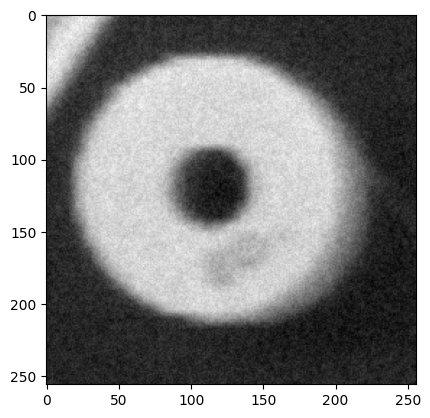

In [14]:
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.imshow(imagen_RONDELLE, cmap='gray')
plt.show()

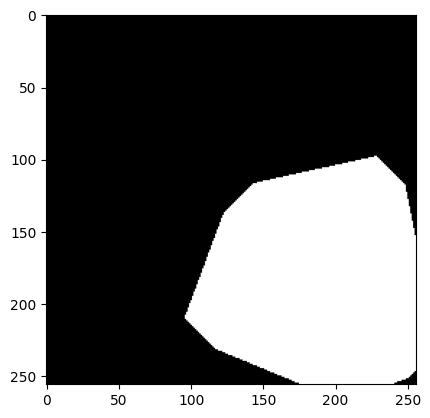

In [15]:
plt.imshow(imagen_SPOT, cmap='gray')
plt.show()

## Las imágenes leídas son de 8 bits. Para ejecutar las operaciones a continuación debemos convertirlas a 16 bits, ya sea usando los flags de la función imread de opencv-python si la imagen es de originalmente 16 bits, o realizando una conversión de la misma.

Iniciamos comprobando si las imágenes son leídas en 8 bit. Para esto leemos el atributo dtype de la imagen.

In [16]:
print(imagen_RONDELLE.dtype)  # uint8 = 8 bits, uint16 = 16 bits

uint8


Cambiamos el tipo a 16 bits con numpy.

In [17]:
import numpy as np
imagen_RONDELLE_16_bits = imagen_RONDELLE.astype(np.uint16)
imagen_SPOT_16_bits = imagen_SPOT.astype(np.uint16)

Validamos que queda en 16 bits.

In [18]:
print(imagen_RONDELLE_16_bits.dtype)

uint16


## Visualice los histogramas de las imágenes.

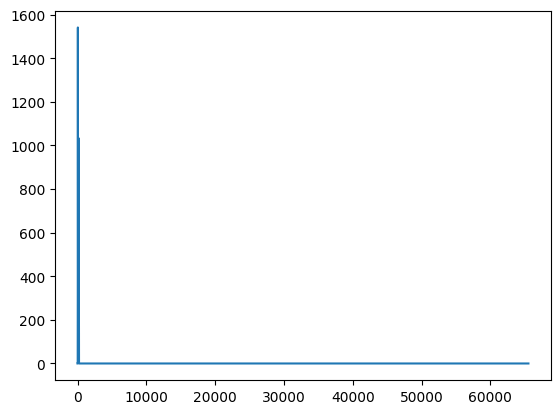

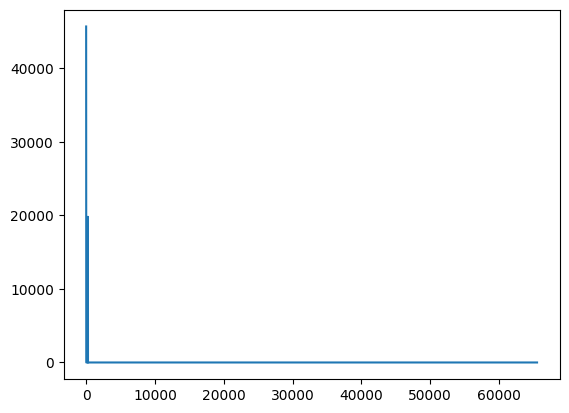

In [19]:
import matplotlib.pyplot as plt
import cv2

hist = cv2.calcHist([imagen_RONDELLE_16_bits],[0],None,[65536],[0,65536])
plt.plot(hist)
plt.show()
hist2 = cv2.calcHist([imagen_SPOT_16_bits],[0],None,[65536],[0,65536])
plt.plot(hist2)
plt.show()

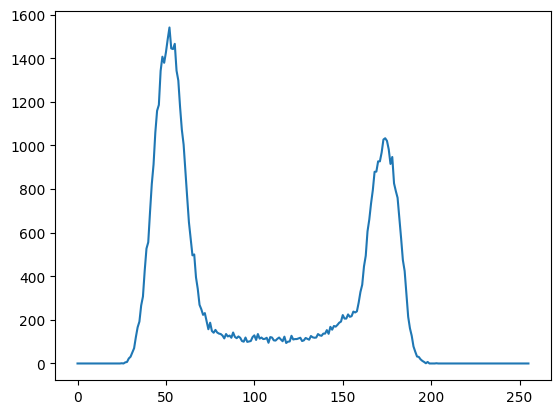

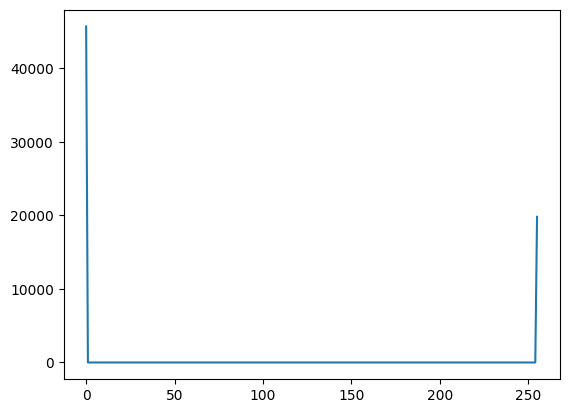

In [21]:
import matplotlib.pyplot as plt
import cv2

hist = cv2.calcHist([imagen_RONDELLE_16_bits],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
hist2 = cv2.calcHist([imagen_SPOT_16_bits],[0],None,[256],[0,256])
plt.plot(hist2)
plt.show()

## Explique las formas de cada uno de estos histogramas.

Vemos los histogramas de ambas imagenes. El rango completo de valores de intesidad de los nuevos valores en 16 bits es de 0 a 2^16 - 1. Pero si visualizamos este rango, se pierde mucha información ya que los valores siguen estando entre 0 y 255. Por lo tanto, vemos los histogramas en esta escala y podemos ver que el histograma de SPOT solo tiene 2 valores de intensidad (negro y blanco), mientras que en la imagen de RONDELLE, vemos dos picos, de grises oscuros y luego más claros.

## Adicione rondelle.png a spot.png utilizando la operación de adición.

In [22]:
import cv2

addition = cv2.add(imagen_RONDELLE_16_bits, imagen_SPOT_16_bits)

## Visualice el histograma y la imagen resultado. Justifique los valores de los niveles de gris de esta imagen.

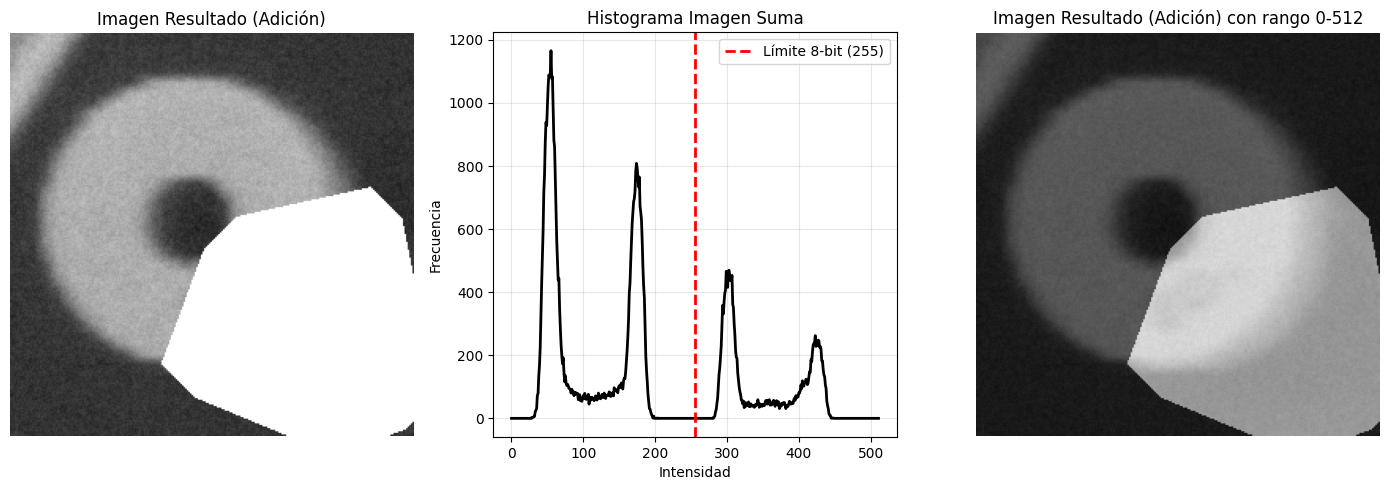

Rango de la suma: [27, 448]


In [34]:
# Visualizar imagen resultado y su histograma
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Imagen resultado
axes[0].imshow(addition, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen Resultado (Adición)')
axes[0].axis('off')

# Histograma de la suma con rango extendido
hist_suma = cv2.calcHist([addition], [0], None, [512], [0, 512])
axes[1].plot(hist_suma, 'k', linewidth=2)
axes[1].set_title('Histograma Imagen Suma')
axes[1].set_xlabel('Intensidad')
axes[1].set_ylabel('Frecuencia')
axes[1].axvline(x=255, color='r', linestyle='--', linewidth=2, label='Límite 8-bit (255)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()


axes[2].imshow(addition, cmap='gray', vmin=0, vmax=512)
axes[2].set_title('Imagen Resultado (Adición) con rango 0-512')
axes[2].axis('off')


plt.tight_layout()
plt.show()

# Ver el rango real de valores
print(f"Rango de la suma: [{addition.min()}, {addition.max()}]")

En la imagen resultado de la adición podemos ver que queda el spot blanco en la imagen RONDELLE, si limitamos los valores de intensidad hasta 256. Esto es el resultado de la suma. También vemos un cambio interesante en el histograma. Hay dos nuevos picos que son producto de la suma y del overflow que genera. Si vemos solo los valores hasta 8 bits, nos perdemos esto. Por lo cual, extedemos le rango de los valores de intesidad hasta 512.

También, visualizamos la suma de imágenes con el rango de intensidad hasta 512. En este caso, se ve como se aclara la parte de spot y se oscure el resto de la imagen. Vale la pena destacar que el spot no queda totalmente blanco. En cambio, queda con tonos claros de grises.

## Aplique ahora una sustracción usando la operación subtract (rondelle.png - spot.png y viceversa). ¿Cómo afecta al resultado la inversión de los operandos?

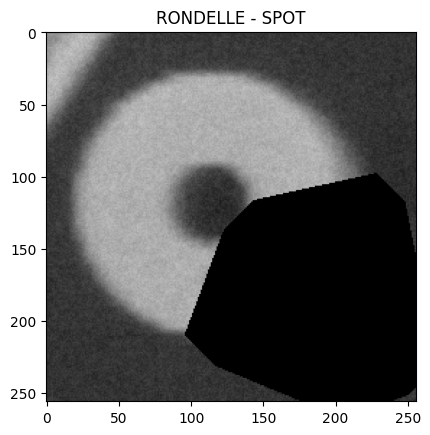

In [40]:
sub1 = cv2.subtract(imagen_RONDELLE_16_bits, imagen_SPOT_16_bits)
sub2 = cv2.subtract(imagen_SPOT_16_bits, imagen_RONDELLE_16_bits)

plt.imshow(sub1, cmap='gray', vmin=0, vmax=255)
plt.title('RONDELLE - SPOT')
plt.show()


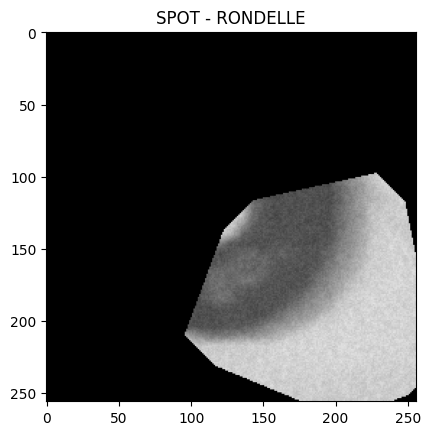

In [41]:
plt.imshow(sub2, cmap='gray', vmin=0, vmax=255)
plt.title('SPOT - RONDELLE')
plt.show()

Al cambiar el orden de los operandos cambia completamente la imagen resultado. En RONDELLE - SPOT vemos cómo se pone oscuro el spot y en SPOT - RONDELLE vemos como solo se ve la sección de RONDELLE en la parte blanca del SPOT.

## Conociendo únicamente los histogramas de las imágenes operandos (y no las imágenes mismas), ¿es posible prever el histograma de la imagen que se obtendrá con una operación aritmética sobre estas imágenes operandos? ¿Por qué?

No es posible prever el histograma de la imagen resultado únicamente conociendo los histogramas de las imágenes operandas. Esto se debe a que el histograma solo nos da información estadística sobre la distribución de intensidades (cuántos píxeles hay de cada valor), pero no nos indica la posición espacial de esos píxeles en la imagen. Para realizar una operación aritmética como la adición, se necesita saber qué píxel se suma con cuál, es decir, la correspondencia espacial píxel a píxel. 